<a href="https://colab.research.google.com/github/hugoplm/santander-coders/blob/master/4_Exercicio_DeepLearning_Paissagem/DL_Paissagem_Modelo3_Hugo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baixando os Dados

In [1]:
!pip install -Uqqq gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [2]:
!gdown 1ORgjWsWnGHdmi7wOZZV64GbQNE4SXkh7

Downloading...
From: https://drive.google.com/uc?id=1ORgjWsWnGHdmi7wOZZV64GbQNE4SXkh7
To: /content/seg_train.zip
100% 215M/215M [00:01<00:00, 146MB/s]


In [3]:
import shutil

In [4]:
shutil.unpack_archive('seg_train.zip', 'data')

# Carregando os Dados

In [5]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [6]:
path = "/content/data/seg_train/**/*.jpg"

In [7]:
X = []
y = []

for files in glob.glob(path, recursive=True):
  image = cv2.imread(files)
  image = cv2.resize(image, (125,125))
  X.append(image)
  y.append(files.split('/')[-2])

In [8]:
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(14034, 125, 125, 3)
(14034,)


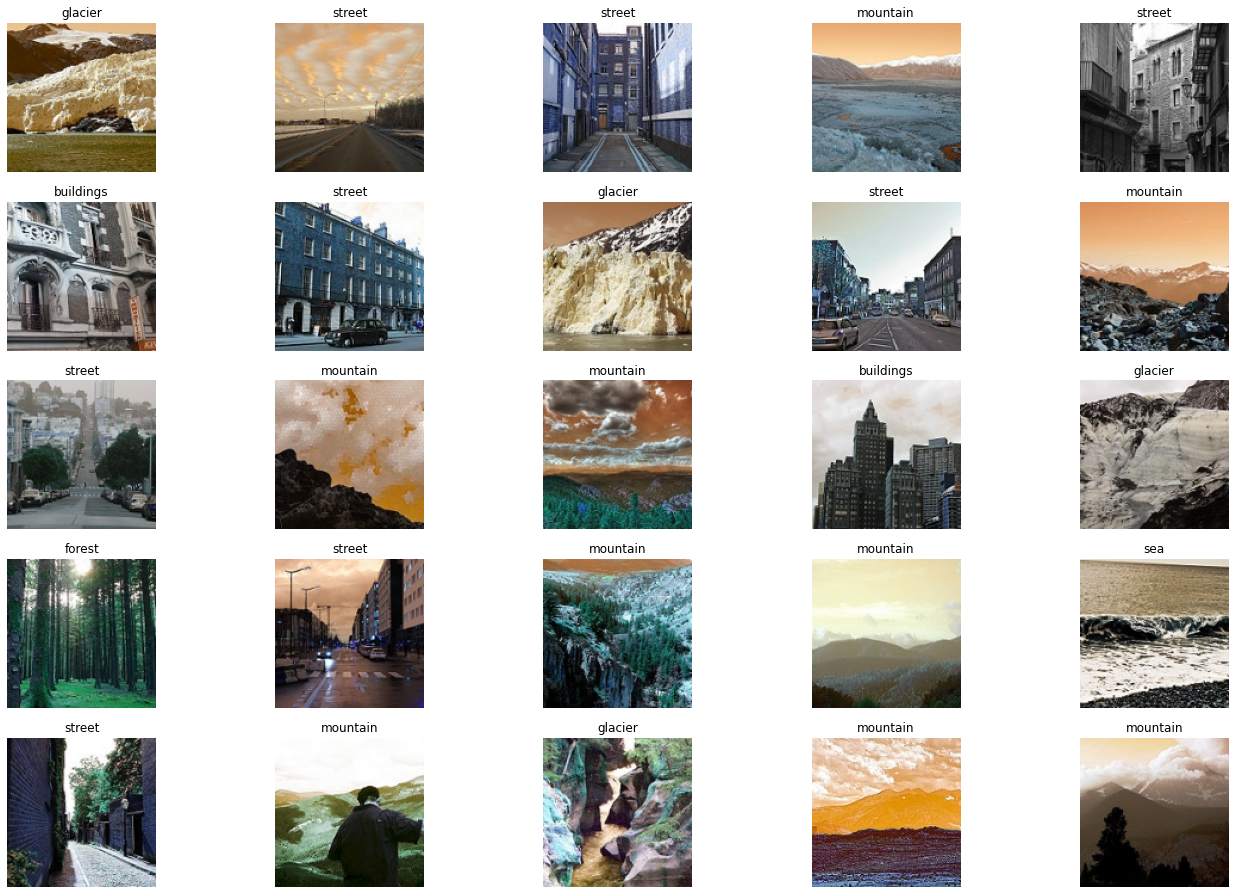

In [9]:
f, ax = plt.subplots(5,5)
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
  for j in range(0,5,1):
    rnd_number = randint(0,len(X))
    ax[i,j].imshow(X[rnd_number])
    ax[i,j].set_title(y[rnd_number])
    ax[i,j].axis('off')

# Pré-processamento dos Dados

In [10]:
X_train, X_val, y_train, y_val = train_test_split(
     X, y, stratify=y, test_size=0.33, random_state=42)

In [11]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1,1)).toarray()
y_val = hot.transform(y_val.reshape(-1,1)).toarray()

In [12]:
X_train = X_train / 255
X_val = X_val / 255

Distribuição das Classes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


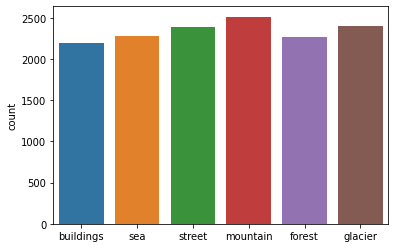

In [13]:
import seaborn as sns
sns.countplot(y);

#Modelo Deep Learning

## Carregando as Bibliotecas

In [14]:
from tensorflow.python.keras.layers import Input, Dense, Activation, Dropout, Flatten
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Modelo 3

Maior quantidade de camadas e de neurônios

### Definição da Arquitetura

In [15]:
rede = Sequential()

rede.add(Flatten())
rede.add(Dense(32,  input_dim = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]))
rede.add(Activation('relu'))
rede.add(Dense(64))
rede.add(Activation('relu'))
rede.add(Dense(64))
rede.add(Activation('relu'))
rede.add(Dense(128))
rede.add(Activation('relu'))
rede.add(Dense(128))
rede.add(Activation('relu'))
rede.add(Dense(6))
rede.add(Activation('softmax'))

In [16]:
es = EarlyStopping(monitor = 'val_loss', 
                   min_delta = 0.001, 
                   patience = 10, 
                   verbose = 1, 
                   mode = 'auto')

In [17]:
rede.compile(loss = 'categorical_crossentropy', 
              optimizer = 'Adam', 
              metrics=['accuracy'])

### Treinamento do Modelo

In [18]:
hist = rede.fit(X_train, 
                y_train, 
                epochs = 25,
                batch_size=32,
                verbose = 1,
                validation_data = (X_val, y_val),
                callbacks = [es])

Epoch 1/25
294/294 [==============================] - 9s 26ms/step - loss: 1.5244 - accuracy: 0.3884 - val_loss: 1.3295 - val_accuracy: 0.4922
Epoch 2/25
294/294 [==============================] - 6s 21ms/step - loss: 1.3144 - accuracy: 0.4853 - val_loss: 1.2293 - val_accuracy: 0.5291
Epoch 3/25
294/294 [==============================] - 6s 21ms/step - loss: 1.2372 - accuracy: 0.5195 - val_loss: 1.2706 - val_accuracy: 0.5028
Epoch 4/25
294/294 [==============================] - 6s 21ms/step - loss: 1.1952 - accuracy: 0.5364 - val_loss: 1.1927 - val_accuracy: 0.5440
Epoch 5/25
294/294 [==============================] - 6s 21ms/step - loss: 1.1697 - accuracy: 0.5434 - val_loss: 1.1997 - val_accuracy: 0.5393
Epoch 6/25
294/294 [==============================] - 6s 21ms/step - loss: 1.1562 - accuracy: 0.5534 - val_loss: 1.2641 - val_accuracy: 0.4903
Epoch 7/25
294/294 [==============================] - 7s 23ms/step - loss: 1.1372 - accuracy: 0.5576 - val_loss: 1.1742 - val_accuracy: 0.5449

### Avaliação do Modelo

In [19]:
pred = rede.predict(X_val)

accuracy_score(y_val.argmax(1), pred.argmax(1))

0.5639032815198618

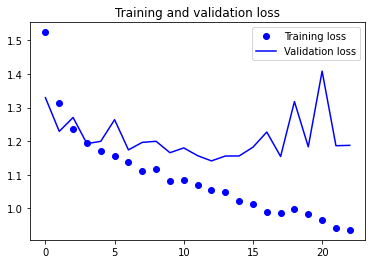

In [20]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Avaliação do Modelo com os Dados de Teste

Baixando os Dados de Teste

In [21]:
!gdown 1nU6df-JlgRc3UQHiPBFD4QpxF_Yv_Lhi

Downloading...
From: https://drive.google.com/uc?id=1nU6df-JlgRc3UQHiPBFD4QpxF_Yv_Lhi
To: /content/seg_test.zip
100% 46.0M/46.0M [00:00<00:00, 136MB/s]


In [23]:
shutil.unpack_archive('seg_test.zip', 'data')

Carregando os Dados de Teste

In [24]:
path = "/content/data/seg_test/**/*.jpg"

In [33]:
X_test = []
y_test = []

for files in glob.glob(path, recursive=True):
  image = cv2.imread(files)
  image = cv2.resize(image, (125,125))
  X_test.append(image)
  y_test.append(files.split('/')[-2])

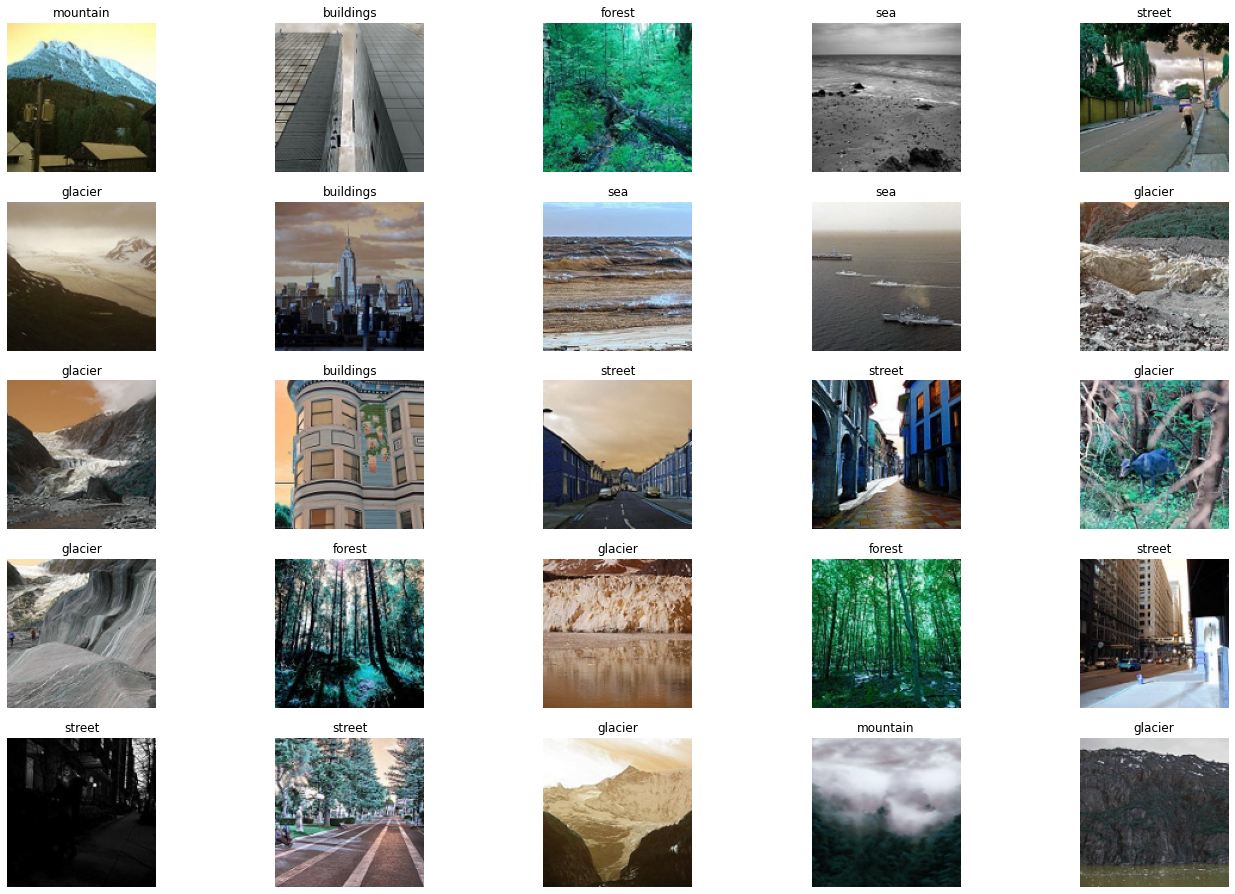

In [34]:
f, ax = plt.subplots(5,5)
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
  for j in range(0,5,1):
    rnd_number = randint(0,len(X_test))
    ax[i,j].imshow(X_test[rnd_number])
    ax[i,j].set_title(y_test[rnd_number])
    ax[i,j].axis('off')

Pré-processamento dos Dados de Teste

In [26]:
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(3000, 125, 125, 3)
(3000,)


In [27]:
y_test = hot.transform(y_test.reshape(-1,1)).toarray()

In [28]:
X_test = X_test / 255

Avaliação do Modelo

In [29]:
pred_test = rede.predict(X_test)

accuracy_score(y_test.argmax(1), pred_test.argmax(1))

0.5483333333333333